In [1]:
import numpy as np
import statsrat as sr # functions for plotting, model fits etc.
from statsrat import expr # define experiments
from statsrat import rw # Rescorla-Wagner style models
from statsrat import bayes_regr # Bayesian regression models

In [2]:
# Define an experiment for the Inverse Base Rate Effect (IBRE)
# This is based on Kruschke (1996), Experiment 1 (missing some of the test trial types)

# Schedule object
design = expr.schedule(resp_type = 'choice',
                      stages = {
                          'training': expr.stage(
                                freq = [3, 1, 3, 1],
                                x_pn = [['i1', 'pc1'], ['i1', 'pr1'], ['i2', 'pc2'], ['i2', 'pr2']],
                                y = [['c1'], ['r1'], ['c2'], ['r2']],
                                y_psb = ['c1', 'r1', 'c2', 'r2'],
                                n_rep = 15),
                          'test': expr.stage(
                                x_pn = [['pc1'], ['pr1'], ['pc2'], ['pr2'], ['pc1', 'pr1'], ['pc2', 'pr2']],
                                y_psb = ['c1', 'r1', 'c2', 'r2'],
                                lrn = False, # There should not be learning because this is a test stage without feedback.
                                n_rep = 2)
                      })

# OAT object
pc_pr = expr.oat(schedule_pos = ['design'],
                 behav_score_pos = expr.behav_score(stage = 'test',
                                                    trial_pos = ['pc1.pr1 -> nothing', 'pc2.pr2 -> nothing'],
                                                    trial_neg = ['pc1.pr1 -> nothing', 'pc2.pr2 -> nothing'],
                                                    resp_pos = ['r1', 'r2'],
                                                    resp_neg = ['c1', 'c2']))

# Experiment object
basic_ibre = expr.experiment(schedules = {'design': design},
                             oats = {'pc_pr': pc_pr})

# Note that in this case we could also use the pre-defined version of the experiment object 
# using the following code (which is commented out).
#from statsrat.expr.predef.cat import basic_ibre

In [3]:
# Define some Rescorla-Wagner family learning models

# The derived attention model from Le Pelley, Mitchell, Beesley, George and Wills (2016).
drva = rw.model(name = 'drva',
                pred = rw.pred.identity,
                fbase = rw.fbase.elem,
                fweight = rw.fweight.none,
                lrate = rw.lrate.from_aux_feature,
                drate = rw.drate.zero,
                aux = rw.aux.drva)

# CompAct (with only elemental features); Model 4 from Paskewitz and Jones (2020).
CompAct = rw.model(name = 'CompAct',
                   pred = rw.pred.identity,
                   fbase = rw.fbase.elem,
                   fweight = rw.fweight.from_aux_norm,
                   lrate = rw.lrate.from_aux_norm,
                   drate = rw.drate.zero,
                   aux = rw.aux.gradcomp)

# Note that both of these models are also pre-defined and could be imported using the following code (commented out)
#from statsrat.rw.predef import drva, CompAct

In [4]:
# Define a Bayesian regression learning model with derived attention
bayes_regr_drva = bayes_regr.model(name = 'bayes_regr_drva',
                                   fbase = rw.fbase.elem,
                                   link = bayes_regr.link.linear,
                                   tausq_inv_dist = bayes_regr.tausq_inv_dist.ard_drv_atn)

In [5]:
# Perform ordinal adequacy test for the derived attention model
drva_oat_result = sr.perform_oat(experiment = basic_ibre,
                                 model = drva,
                                 minimize = True, 
                                 n = 10) # Run multiple "participants" (really just trial sequences)
print(np.round(drva_oat_result[0], 4))
print(np.round(drva_oat_result[1], 4))

# **MAKE COMMENTS ABOUT THE MODELS' ADEQUACY**

Maximizing OAT score.
Minimizing OAT score.
     atn_min   lrate    mean   lower   upper
min   0.0010  0.7006 -0.9738 -0.9752 -0.9724
max   0.8575  0.9990  0.4004  0.3468  0.4540
  schedule          trial_name y_name  mean_resp parameters
0   design  pc1.pr1 -> nothing     c1     0.9736        min
1   design  pc1.pr1 -> nothing     c2     0.0131        min
2   design  pc1.pr1 -> nothing     r1     0.0002        min
3   design  pc1.pr1 -> nothing     r2     0.0131        min
4   design  pc2.pr2 -> nothing     c1     0.0127        min
5   design  pc2.pr2 -> nothing     c2     0.9744        min
6   design  pc2.pr2 -> nothing     r1     0.0127        min
7   design  pc2.pr2 -> nothing     r2     0.0002        min
0   design  pc1.pr1 -> nothing     c1     0.2330        max
1   design  pc1.pr1 -> nothing     c2     0.0624        max
2   design  pc1.pr1 -> nothing     r1     0.6423        max
3   design  pc1.pr1 -> nothing     r2     0.0624        max
4   design  pc2.pr2 -> nothing     c1    

[0.0821]


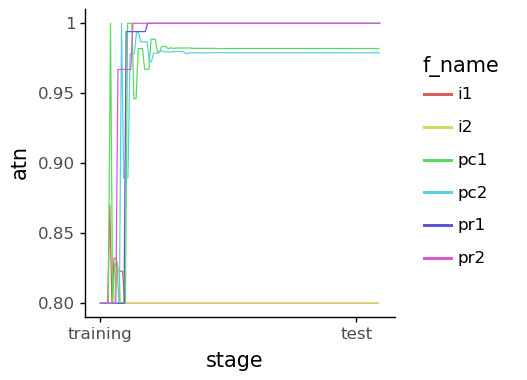

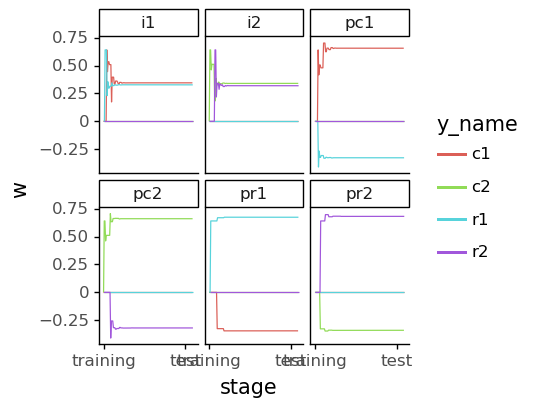

<ggplot: (8777739993176)>

In [43]:
drva_sim = drva.simulate(basic_ibre.make_trials(), [0.8, 0.8, 5.0])
print(np.round(pc_pr.behav_score_pos.compute_scores(drva_sim), 4))
sr.learn_plot(drva_sim, 'a tn').draw()
sr.learn_plot(drva_sim, 'w', facet_var = 'f_name', color_var = 'y_name')
# FIGURE OUT WHAT TO DO ABOUT THE DRVA MODEL PRODUCING AN IBRE

In [7]:
# Perform ordinal adequacy test for CompAct
CompAct_oat_result = sr.perform_oat(experiment = basic_ibre,
                                    model = CompAct,
                                    minimize = True,
                                    n = 10) # Run multiple "participants" (really just trial sequences)
print(np.round(CompAct_oat_result[0], 4))
print(np.round(CompAct_oat_result[1], 4))

Maximizing OAT score.
Minimizing OAT score.
      lrate  lrate_atn  metric    mean  lower   upper
min  0.9990      1.999  6.7759 -0.4421 -0.670 -0.2142
max  0.1063      1.999  2.6884  0.3197  0.308  0.3314
  schedule          trial_name y_name  mean_resp parameters
0   design  pc1.pr1 -> nothing     c1     0.7518        min
1   design  pc1.pr1 -> nothing     c2     0.0139        min
2   design  pc1.pr1 -> nothing     r1     0.2204        min
3   design  pc1.pr1 -> nothing     r2     0.0139        min
4   design  pc2.pr2 -> nothing     c1     0.0135        min
5   design  pc2.pr2 -> nothing     c2     0.6629        min
6   design  pc2.pr2 -> nothing     r1     0.0135        min
7   design  pc2.pr2 -> nothing     r2     0.3101        min
0   design  pc1.pr1 -> nothing     c1     0.2855        max
1   design  pc1.pr1 -> nothing     c2     0.0515        max
2   design  pc1.pr1 -> nothing     r1     0.6115        max
3   design  pc1.pr1 -> nothing     r2     0.0515        max
4   design  pc

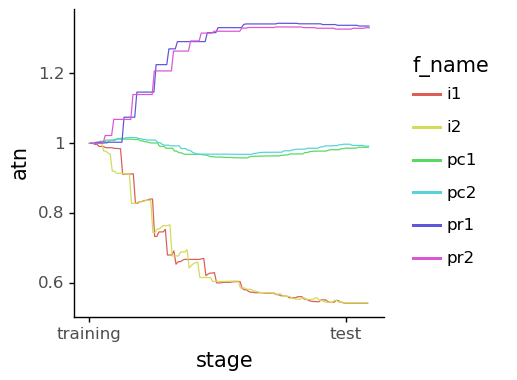

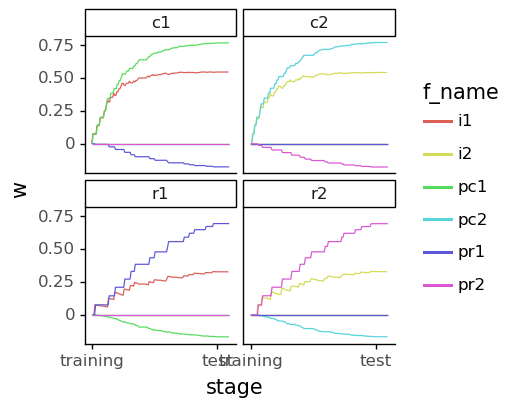

<ggplot: (8777737939577)>

In [20]:
CompAct_sim = CompAct.simulate(basic_ibre.make_trials(), [0.1, 1.9, 2.5, 5.0])
sr.learn_plot(CompAct_sim, 'atn').draw()
sr.learn_plot(CompAct_sim, 'w')

In [9]:
# Perform ordinal adequacy test for the Bayesian regression model with derived attention
brdrva_oat_result = sr.perform_oat(experiment = basic_ibre,
                                   model = bayes_regr_drva,
                                   minimize = True, 
                                   n = 10) # Run multiple "participants" (really just trial sequences)
print(np.round(brdrva_oat_result[0], 4))
print(np.round(brdrva_oat_result[1], 4))

Maximizing OAT score.
Minimizing OAT score.
     prior_tausq_inv_hpar0  prior_tausq_inv_hpar1  y_var    mean   lower  \
min                -1.3744                 9.9966  5.000 -0.2585 -0.2585   
max                -9.9990                 1.0010  0.001 -0.0000 -0.0000   

      upper  
min -0.2585  
max -0.0000  
  schedule          trial_name y_name  mean_resp parameters
0   design  pc1.pr1 -> nothing     c1     0.5113        min
1   design  pc1.pr1 -> nothing     c2     0.1179        min
2   design  pc1.pr1 -> nothing     r1     0.2528        min
3   design  pc1.pr1 -> nothing     r2     0.1179        min
4   design  pc2.pr2 -> nothing     c1     0.1179        min
5   design  pc2.pr2 -> nothing     c2     0.5113        min
6   design  pc2.pr2 -> nothing     r1     0.1179        min
7   design  pc2.pr2 -> nothing     r2     0.2529        min
0   design  pc1.pr1 -> nothing     c1     0.4218        max
1   design  pc1.pr1 -> nothing     c2     0.0782        max
2   design  pc1.pr1 -> no